# Chess Project

# Table of Contents<span class="tocSkip"></span>
<div class="toc"><ul class="toc-item"><li><span><a href="#About the Dataset" data-toc-modified-id="About the Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>About the Dataset</a></span></li><li><span><a href="#Data Visualization" data-toc-modified-id="Data Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Data Preparation and Preprocessing" data-toc-modified-id="Data Preparation and Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation and Preprocessing</a></span></li><li><span><a href="#Model Planning" data-toc-modified-id="Model Planning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Planning</a></span></li><li><span><a href="#Training models" data-toc-modified-id="Training models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Training models</a></span></li><li><span><a href="#Model Selection" data-toc-modified-id="Model Selection-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Final Model Results" data-toc-modified-id="Final Model Results-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Final Model Results</a></span></li></ul></div>


# 1.Discovery:
   * Chess: Our fascination -as copmuter students- with chess aligns seamlessly with our studies in computer field, as we are drawn to its parallels with algorithmic thinking, pattern recognition, and the strategic mindset that both disciplines demand and thus we chose chess dataset.

   
   * The choosen dataset -from Kaggle- contains just over 20,000 games collected from a selection of users on the site Lichess.org with several labels (start time, end time, number of turns etc..), and our objective is build a model that can predict the game final result (win, loss or draw) based on the various reccords in the dataset.

   ## About the Dataset


This is a set of just over 20,000 games collected from a selection of users on the site Lichess.org, and how to collect more. I will also upload more games in the future as I collect them. This set contains the:

- Game ID




- Rated (T/F)




- Start Time


- End Time


- Number of Turns


- Game Status


- Winner


- Time Increment


- White Player ID


- White Player Rating


- Black Player ID


- Black Player Rating


- All Moves in Standard Chess Notation


- Opening Eco (Standardised Code for any given opening, list here)


- Opening Name


Opening Ply (Number of moves in the opening phase)
For each of these separate games from Lichess. I collected this data using the Lichess API, which enables collection of any given users game history. The difficult part was collecting usernames to use, however the API also enables dumping of all users in a Lichess team. There are several teams on Lichess with over 1,500 players, so this proved an effective way to get users to collect games from.

# 2.Data Preparation:

In [196]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data
df = pd.read_csv('games.csv')
display(df.head(4))
display(df.info())
display(df.describe())

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


None

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [197]:
# We notice that white_id, black_id and the id columns give no information, so we drop them
df.drop(['id', 'white_id', 'black_id'], axis=1, inplace=True)

In [198]:
# Previewing dataset columns lenghts to see who should be splitted in multiple columns

for col in df.columns:
    print(f"{col} length: {len(df[col].unique())}")

rated length: 2
created_at length: 13151
last_move_at length: 13186
turns length: 211
victory_status length: 4
winner length: 3
increment_code length: 400
white_rating length: 1516
black_rating length: 1521
moves length: 18920
opening_eco length: 365
opening_name length: 1477
opening_ply length: 23


In [199]:
# perform label encoding on boolen column
df['rated'] = df['rated'].astype(int)

# Perform One Hot Encoding on categorical columns with less than 5 unique values
df = pd.get_dummies(df, columns=['victory_status'],drop_first=False)

In [200]:

# Convert new colmuns  from uint8 to int
columns = ['victory_status_draw', 'victory_status_mate',
       'victory_status_outoftime', 'victory_status_resign']

df.loc[:, columns] = df.loc[:, columns].astype(int)

In [201]:
# Previewing the moves stats to get a sense of the data
import math
df['moves'].apply(lambda x: math.ceil(len(x.split(' '))/2)).describe()

count    20058.000000
mean        30.490278
std         16.782955
min          1.000000
25%         19.000000
50%         28.000000
75%         40.000000
max        175.000000
Name: moves, dtype: float64

In [202]:
# Now we are going to add a new column with the number of moves in each game
df['moves_num'] = df['moves'].apply(lambda x: math.ceil(len(x.split(' '))/2))


In [203]:
# The max number of moves in proffinal chess is less than 150, so we drop all outliers games
Q1 = df['moves_num'].quantile(q=0.25) 
Q3 = df['moves_num'].quantile(q=0.75)

IQR = Q3 - Q1

df.drop(df[df['moves_num'] >= Q3 + 1.5*IQR].index, inplace=True)

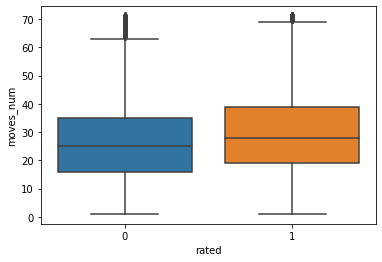

In [204]:
# Ploting box plot after deleting outliers
plt.figure()
sns.boxplot(y='moves_num',x='rated',data=df);
plt.show()

In [205]:
# We notice that still  there are some noisy in the data especially the lower wisker of the boxplot (there are many games with 1 moves)
# In chess the minimum number of moves to win a game is 2 moves (Fool's mate) so we will remove all the games with less than 2 moves

OneMove_games = df.drop(df[df['moves_num'] < 8].index, inplace=True)

In [206]:
# We are going to create a new column called period which is the difference between the last move and the creation of the account
df['period'] = df['last_move_at'] - df['created_at']

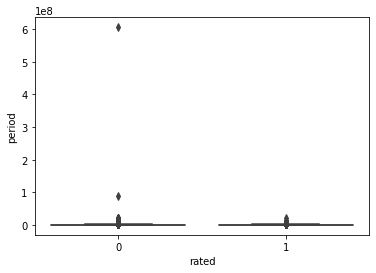

In [207]:
# Ploting box plot for period
plt.figure()
sns.boxplot(y = 'period', x = 'rated', data = df)
plt.show()

In [208]:
# Drop the 'created_at' and 'last_move_at' columns because they are not useful for our analysis and they are given in the wrong format.
times_columns = df.drop(['created_at', 'last_move_at', 'period'], axis=1, inplace=True)

In [209]:
# The increment_code columns represents ..., so we convert it to a better format by taking the number before the + sign
df['increment_code'] = df['increment_code'].str.split('+').str[0].astype(int)
# not a good idea to do this, because it will make the data skewed
#df['increment_code'] = df['increment_code'].apply(lambda x: 1 if x > 0 else 0)
#df['increment_code'] 

In [210]:
def create_2elementsList(array):
    # initialize an empty list for the new array
    new = []
    # loop through the original array with a step of 2
    for i in range(0, len(array), 2):
        # append the two elements as a sub-list to the new array
        new.append(array[i:i+2])
    return new

In [211]:
# Converting the elements of moves column form a sting if moves to a list
df['moves'] = df['moves'].apply(lambda x: create_2elementsList(x.split()))

In [212]:
# Creating an Opening Column where we store the moves taken at the begining if the game using the opening_ply column
df['opening_num'] = df.apply(lambda row: len(row["moves"][:int(row["opening_ply"])]), axis=1)
df.loc[4, 'opening_num']


5

In [213]:
# Creating a column for the number of mid-game moves between the opening and last moves
df['midMoves_num'] = df['moves_num'] - 2- df['opening_ply']

In [214]:
# Preprocessing the opening_name column
df['opening_name'] = df['opening_name'].apply(lambda x: x.split(':')[0].split('|')[0].split('#')[0])

In [215]:
# We going to  deop the opening name  columns because generate a lot of dimnesionality due to high number of unique values
df.drop(['opening_name'], axis=1, inplace=True)

In [216]:
# Now we are going to drop the opening_ply column because it become useless for our analysis
df.drop(['opening_ply'], axis=1, inplace=True)

In [217]:
# We going to drop the opening_eco and moves columns because it is not useful for our analysis
df.drop(['opening_eco', 'moves'], axis=1, inplace=True)

In [218]:
# Change the dataframe from float 64 to float 32
# This is to reduce the memory usage

df.select_dtypes(include= 'float64').astype('float32')

""
1
2
3
4
6
...
20053
20054
20055
20056


In [219]:
# Scaling(Normalizing) numerical columns in the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_columns = df.select_dtypes(exclude=['object']).columns

df[num_columns] = scaler.fit_transform(df[num_columns])
display(df.head())

,rated,turns,winner,increment_code,white_rating,black_rating,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,moves_num,opening_num,midMoves_num
1,1.0,0.007874,black,0.027778,0.280793,0.257642,0.0,0.0,0.0,1.0,0.000000,0.111111,0.195122
2,1.0,0.362205,white,0.027778,0.371608,0.388100,0.0,1.0,0.0,0.0,0.365079,0.074074,0.487805
3,1.0,0.362205,white,0.111111,0.341858,0.362991,0.0,1.0,0.0,0.0,0.365079,0.074074,0.487805
4,1.0,0.629921,white,0.166667,0.385699,0.371179,0.0,1.0,0.0,0.0,0.634921,0.148148,0.670732
6,1.0,0.141732,white,0.055556,0.384134,0.346070,0.0,0.0,0.0,1.0,0.142857,0.333333,0.231707


# 3.Model Planning 

## i. Find the statistical summaries.


In [220]:
# Displaying information about the data including columns and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18593 entries, 1 to 20057
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rated                     18593 non-null  float64
 1   turns                     18593 non-null  float64
 2   winner                    18593 non-null  object 
 3   increment_code            18593 non-null  float64
 4   white_rating              18593 non-null  float64
 5   black_rating              18593 non-null  float64
 6   victory_status_draw       18593 non-null  float64
 7   victory_status_mate       18593 non-null  float64
 8   victory_status_outoftime  18593 non-null  float64
 9   victory_status_resign     18593 non-null  float64
 10  moves_num                 18593 non-null  float64
 11  opening_num               18593 non-null  float64
 12  midMoves_num              18593 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.5+ MB


In [221]:
# Displaying a statistical summary of the data
df.describe()

,rated,turns,increment_code,white_rating,black_rating,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,moves_num,opening_num,midMoves_num
count,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000
mean,0.809498,0.362770,0.074568,0.426715,0.439756,0.041575,0.322648,0.079654,0.556123,0.361827,0.144086,0.462139
std,0.392707,0.224152,0.084777,0.150075,0.157267,0.199621,0.467502,0.270764,0.496854,0.225843,0.102862,0.176880
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.196850,0.055556,0.323591,0.333515,0.000000,0.000000,0.000000,0.000000,0.190476,0.074074,0.329268
50%,1.000000,0.322835,0.055556,0.411273,0.424127,0.000000,0.000000,0.000000,1.000000,0.317460,0.111111,0.439024
75%,1.000000,0.496063,0.083333,0.527662,0.545852,0.000000,1.000000,0.000000,1.000000,0.492063,0.185185,0.573171
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## ii. Make univariate graphs (i.e., graphs based on single variable).


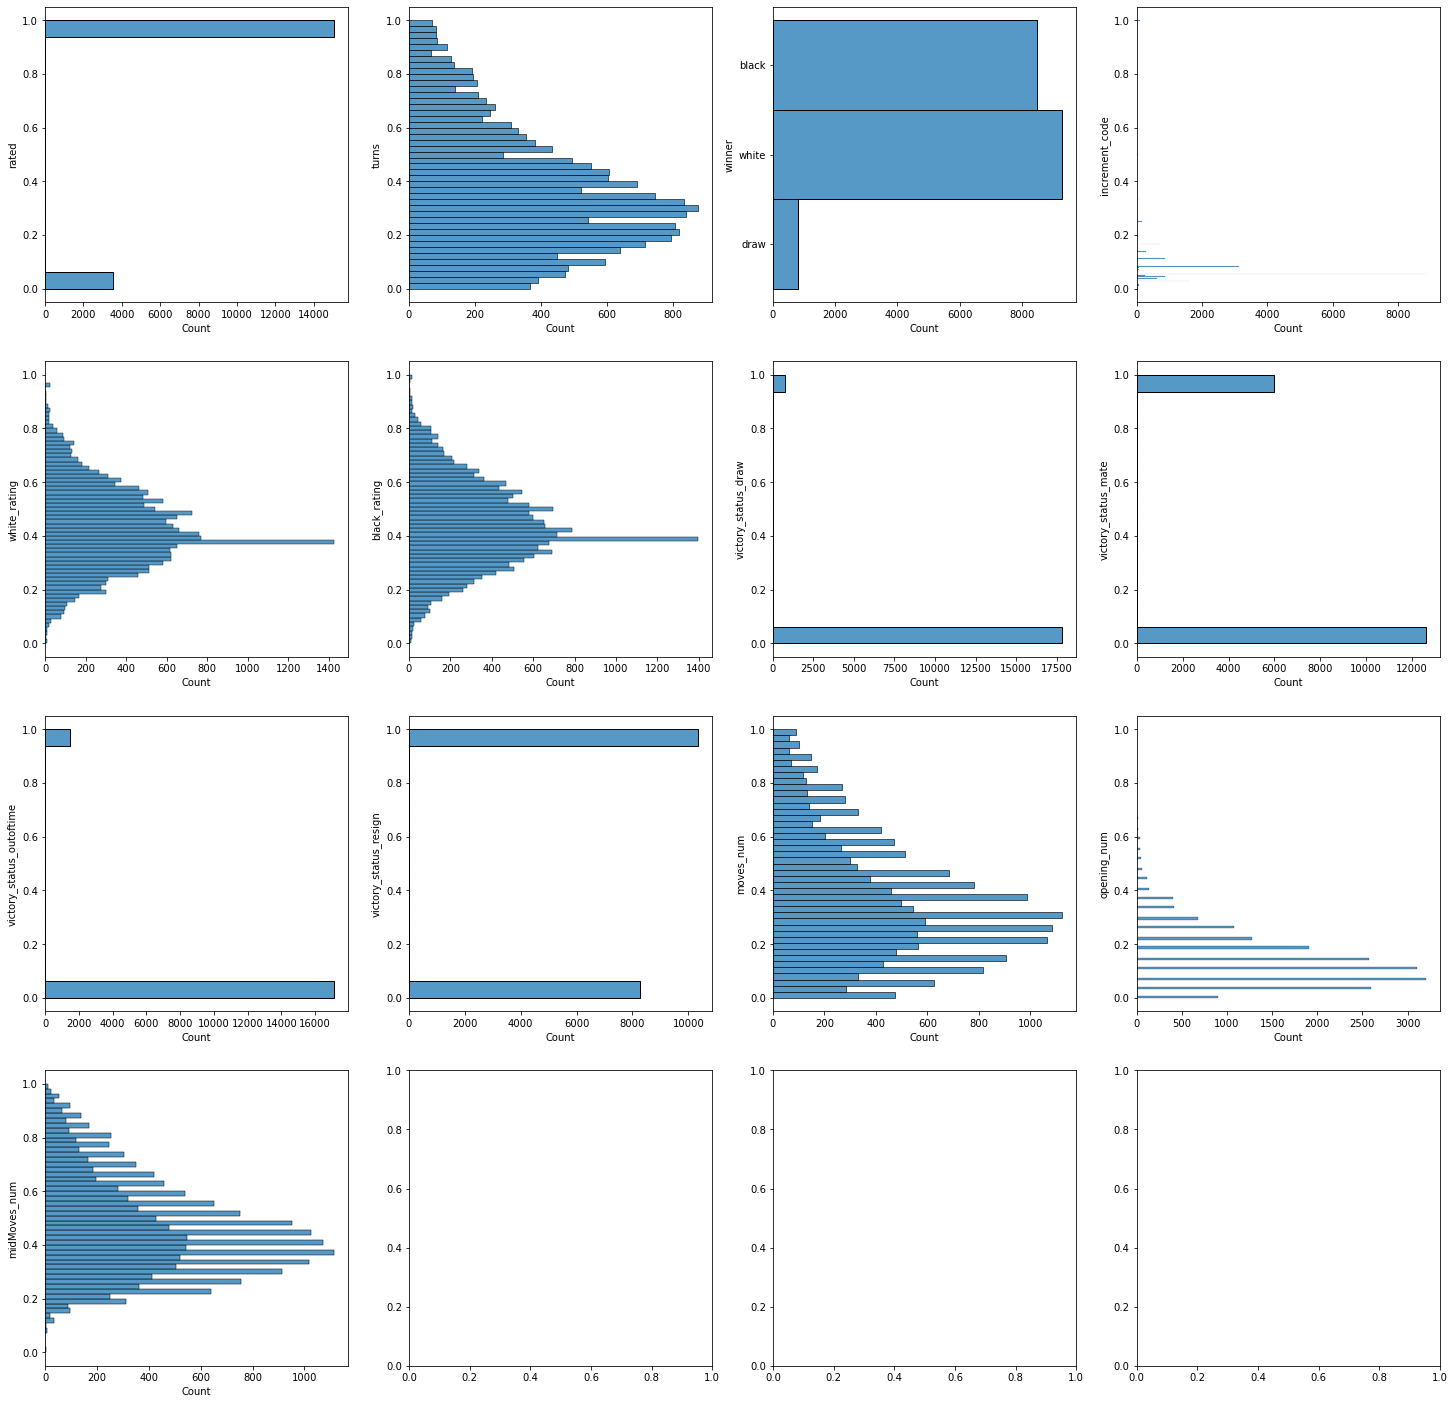

In [222]:
# Plot the Count PLot for the entire DataFrame
nCols=4   # The number of columns that you want
nRows=len(df.columns)//nCols+1   # The number of correspomding rows 

## to avoid rotating labels:
fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(df.columns):
    sns.histplot(y=col,data=df,ax=axes.flatten()[ind])
plt.show()

We notice that the white and black rating are normally distibuted, and the number of moves is a little bit skewed to the right

## iii. Prepare bivariate plots (i.e., plots based on two variables).

<Figure size 1800x1800 with 0 Axes>

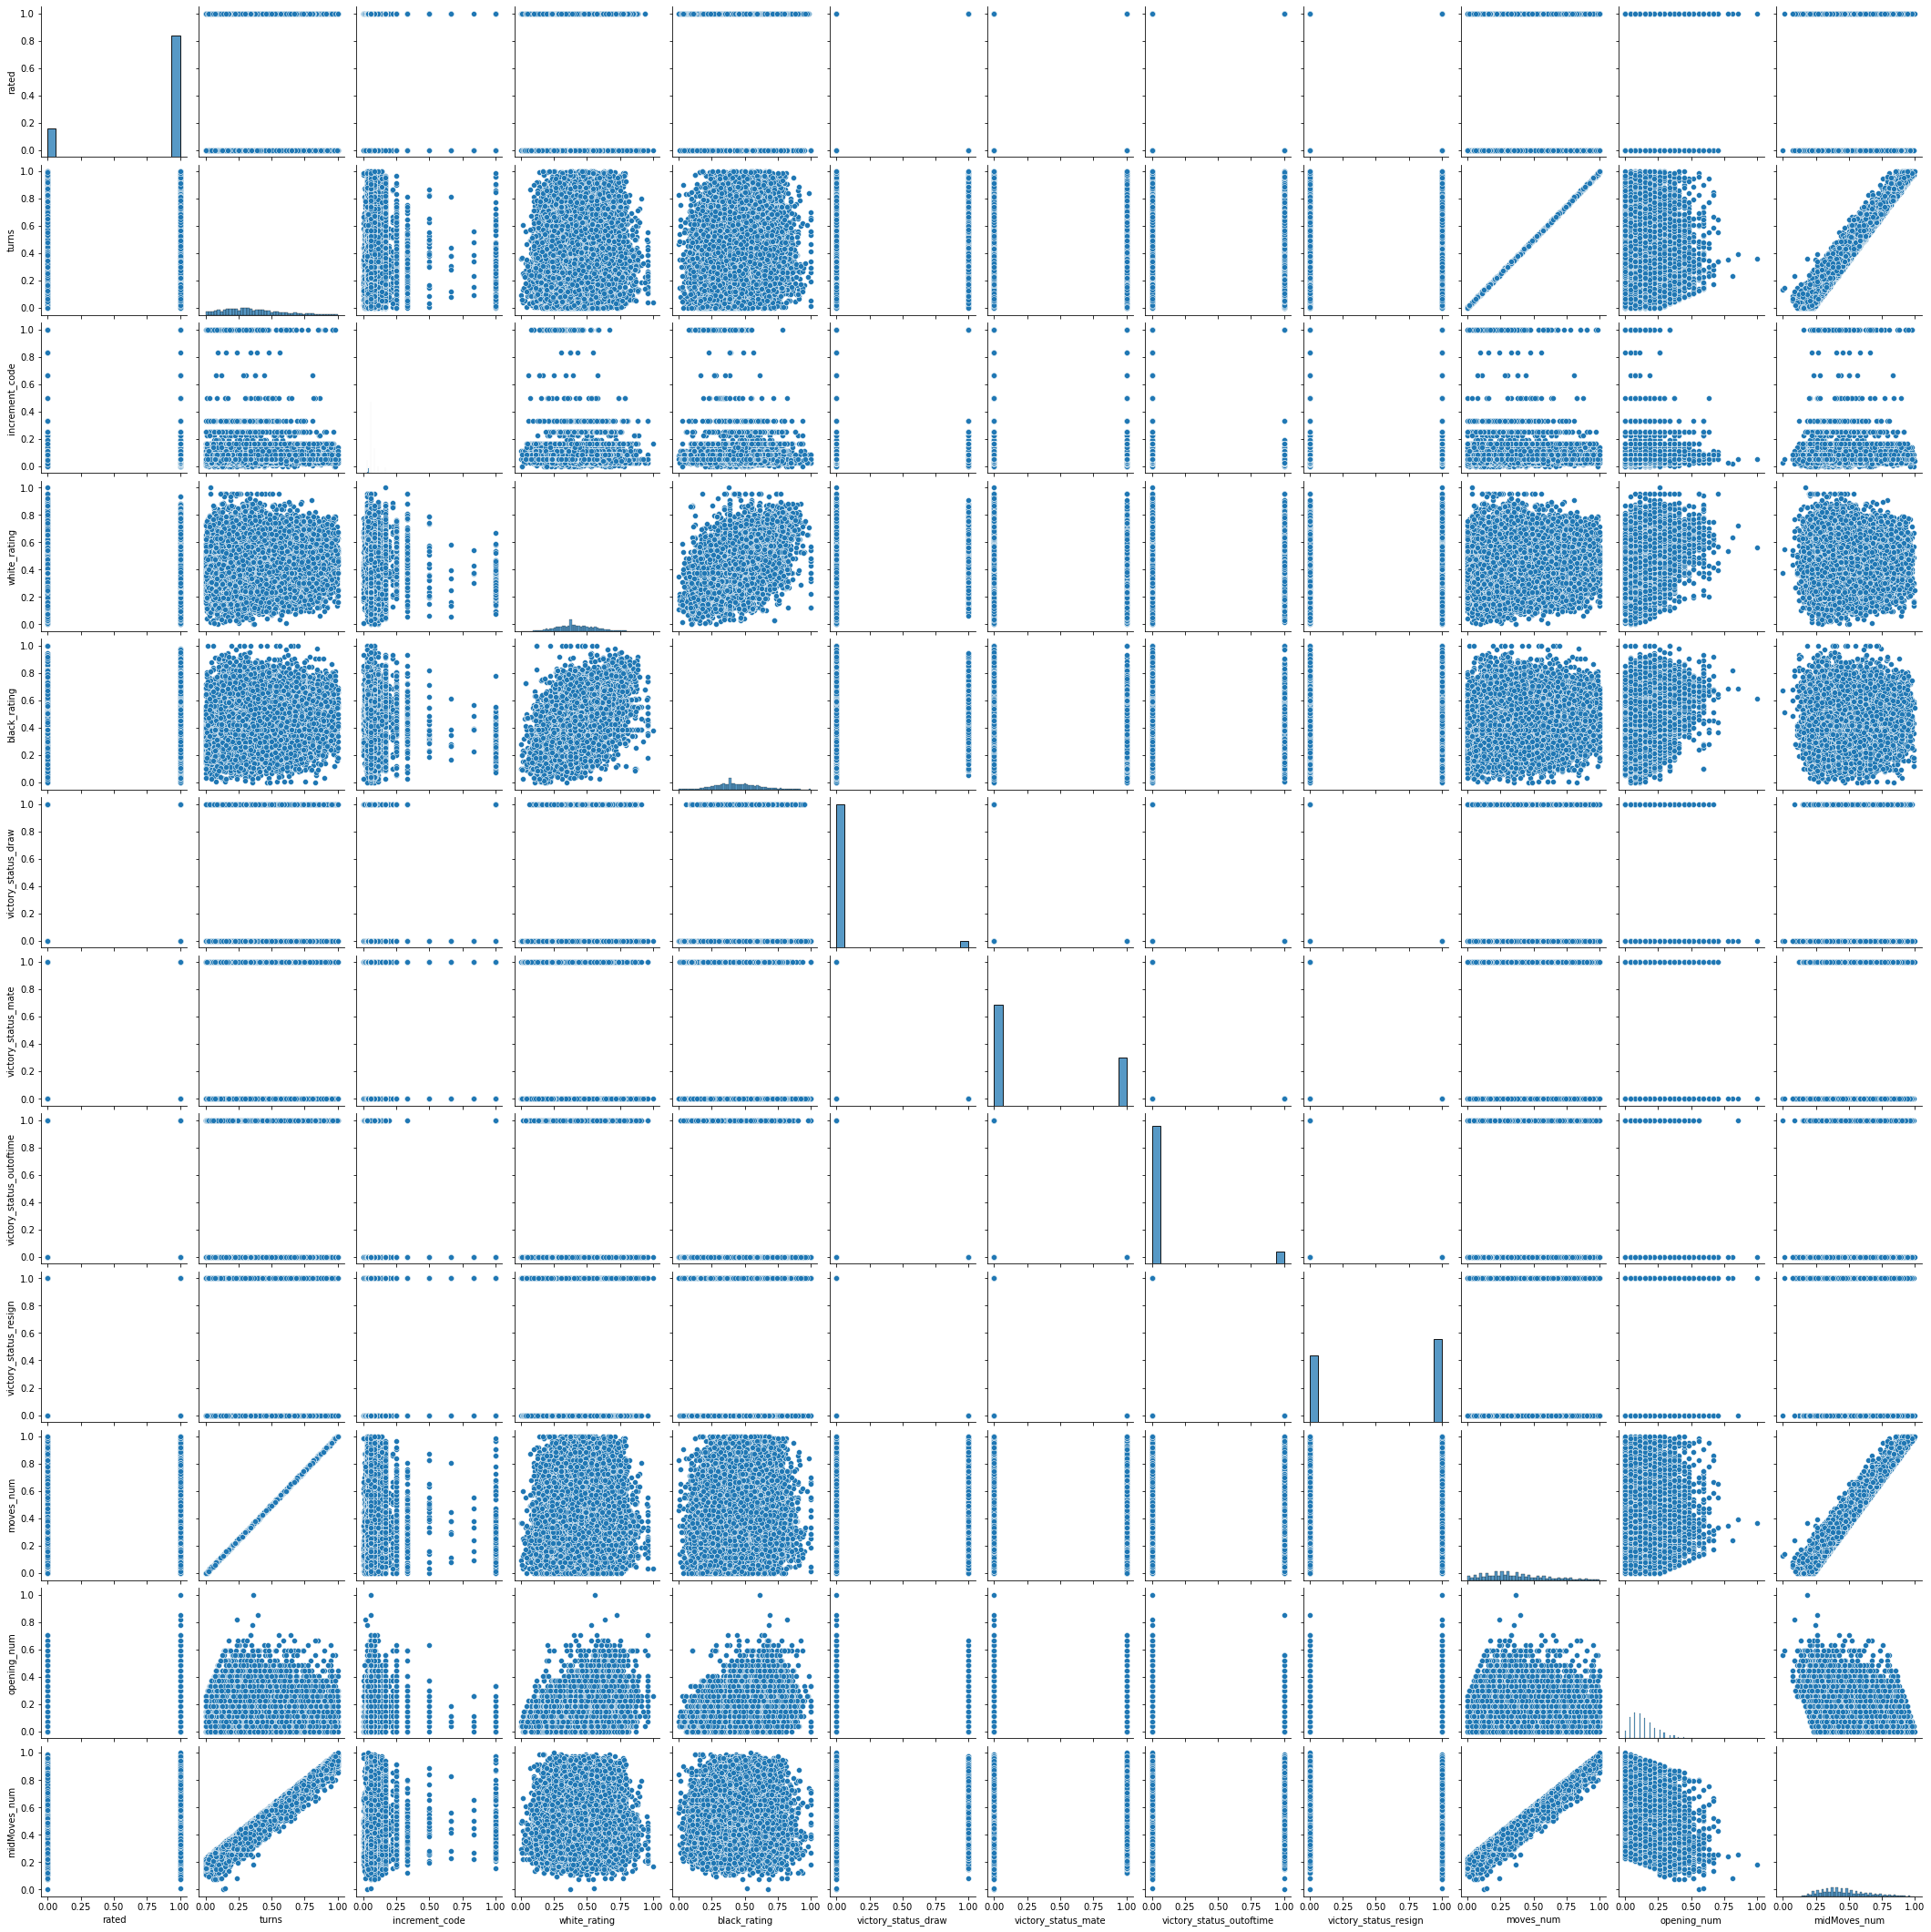

In [223]:
# Plotting a scatter plot between all numaric columns
# Select only the numeric columns
numeric_cols = df.select_dtypes(exclude=['object']).columns

plt.figure(figsize=(25,25))
# Create a pairplot with seaborn
sns.pairplot(df[numeric_cols])

# Show the plot
plt.show()


We notice that when it comes PCA 1&2 several columns cluster itself in three groups

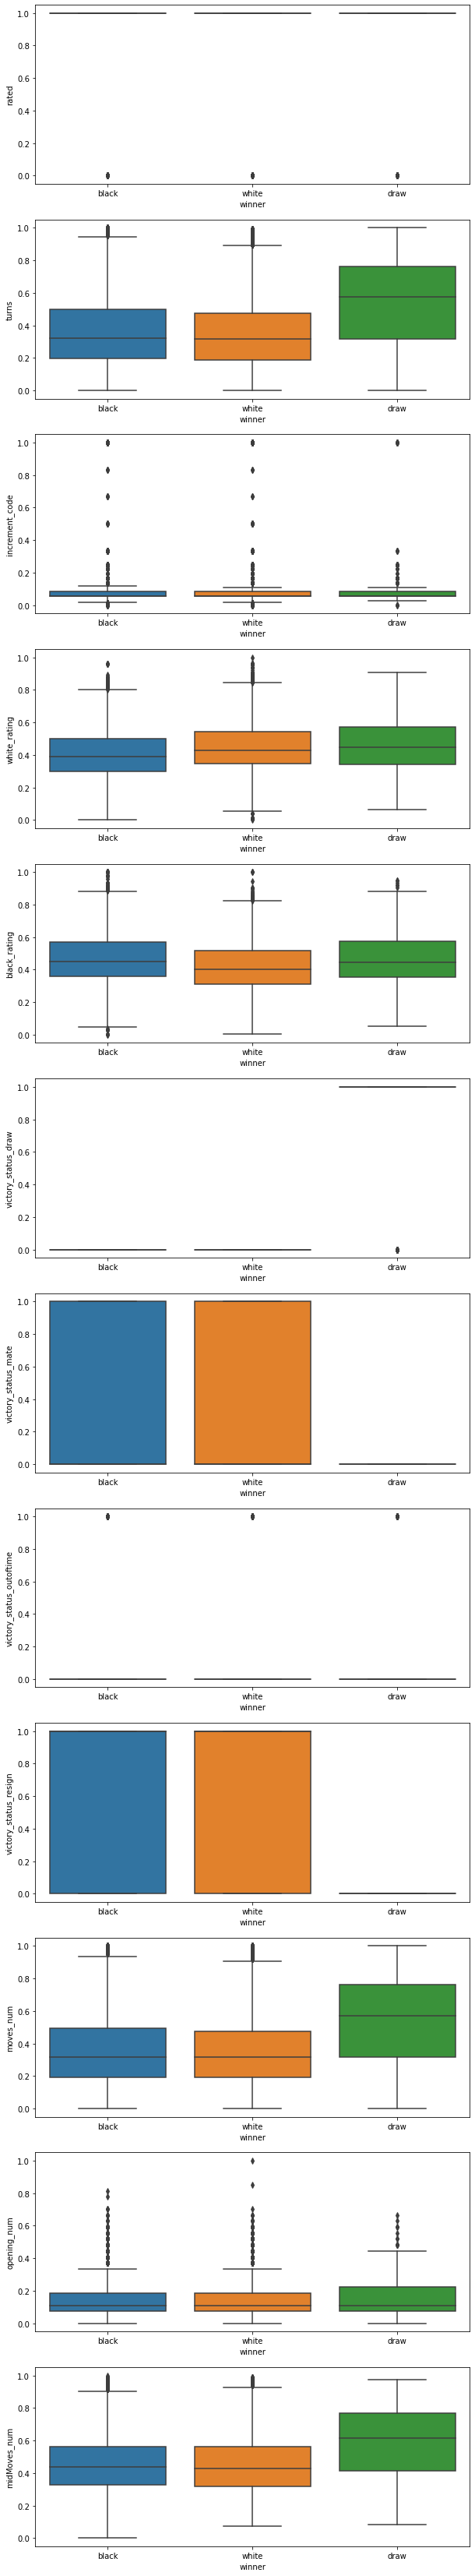

In [224]:
# Select only the numeric columns
numeric_cols = df.select_dtypes(exclude=['object']).columns

# Create a figure to hold the subplots
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 5*len(numeric_cols)))

# Create a boxplot for each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(x='winner', y=col, data=df, ax=axes[i])

# Show the plot
plt.show()

We notice that games where either white or black win are very similar in number of moves and midMoves, but when it comes to draw games they are much higher.

_______________________________________________________________________________________________________________________________________

Line plots are useful for visualizing changes in data over time or for showing trends. However, our cleaned dataset does not seem to have any columns that represent time or a sequence of events (it should have but we delete the time column). Therefore, it is not be suitable for plotting line plots.

## iv. Portray advanced graphs (i.e., graphs based on more than two variables).


The pair plot shows scatter plots for pairs of numerical variables. There appears to be a positive correlation between 'white_rating' and 'black_rating', suggesting that higher-rated players tend to face opponents with similar ratings. Additionally, 'moves_num' seems to have a positive relationship with both 'white_rating' and 'black_rating', suggesting that longer games involve players with higher ratings.

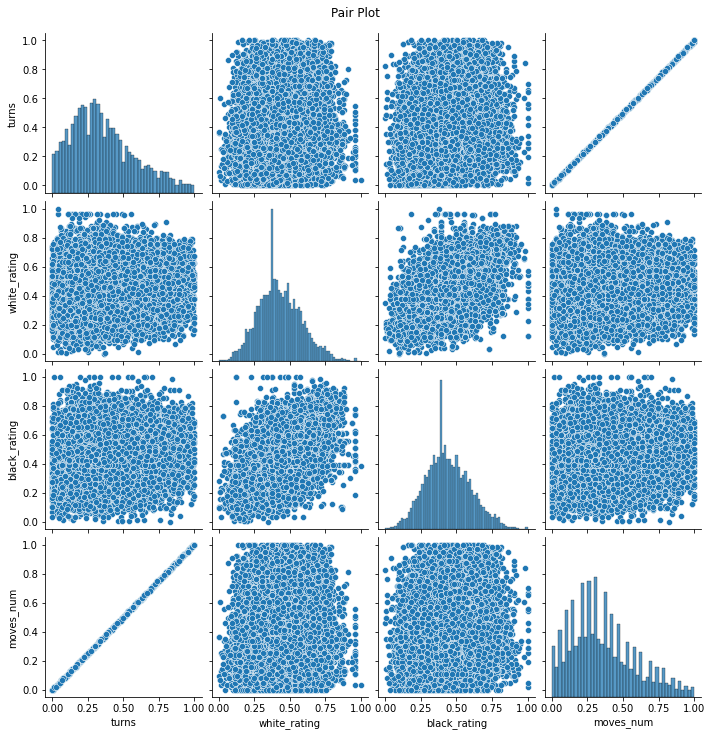

In [225]:
# Pair Plot
sns.pairplot(df[['turns', 'white_rating', 'black_rating', 'moves_num']])
plt.suptitle('Pair Plot', y=1.02)
plt.show()


The box plot of ratings illustrates the distribution of player ratings. It shows that the median rating for both white and black players is around 1900-2000, with some outliers present in both categories.

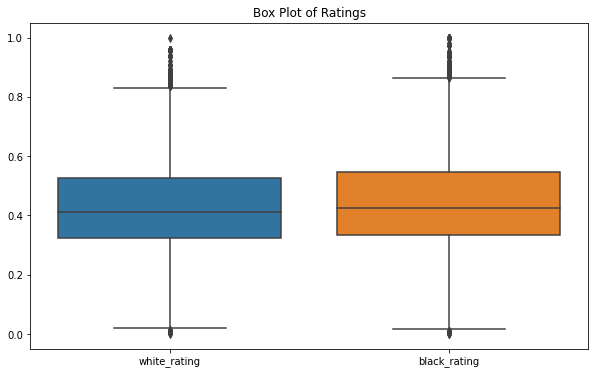

In [226]:
# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['white_rating', 'black_rating']])
plt.title('Box Plot of Ratings')
plt.show()


The scatter plot of player ratings reveals how ratings of white and black players are distributed across winners and losers. It suggests that higher-rated white players tend to win more often, while higher-rated black players also have a good chance of winning.

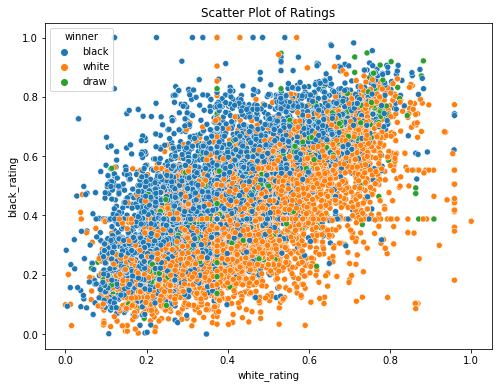

In [227]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='white_rating', y='black_rating', hue='winner')
plt.title('Scatter Plot of Ratings')
plt.show()


Regression Plot of Moves vs. White Rating:

The regression plot demonstrates the relationship between 'moves_num' and 'white_rating'. It suggests a slight positive correlation, implying that games with more moves often involve players with higher white ratings.

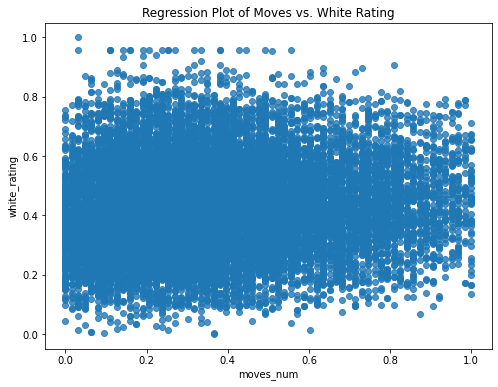

In [228]:

# Regression Plot
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='moves_num', y='white_rating')
plt.title('Regression Plot of Moves vs. White Rating')
plt.show()


The histogram of 'opening_num' indicates the frequency distribution of different opening numbers. It shows that the majority of games have opening numbers around 5 to 10, with a decline in frequency as the opening number deviates from this range.

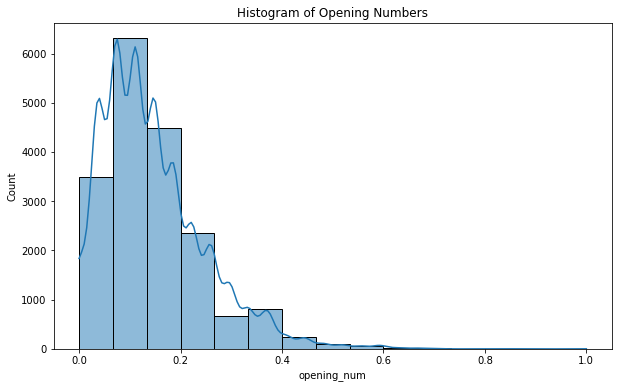

In [229]:

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='opening_num', bins=15, kde=True)
plt.title('Histogram of Opening Numbers')
plt.show()


The Countplot for winner counts demonstrates that the white wins more games than black 

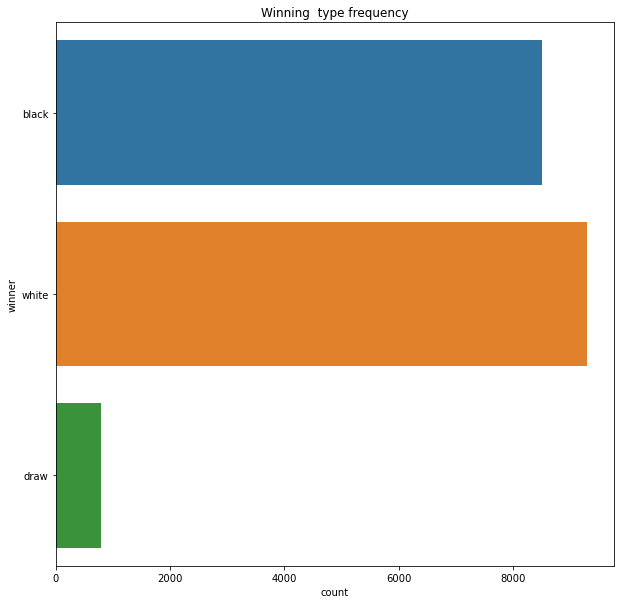

In [230]:

plt.figure(figsize=(10,10))
ax = sns.countplot(y="winner",data=df)
plt.title('Winning  type frequency')
plt.show()


ViolinPlot for winner VS. turns

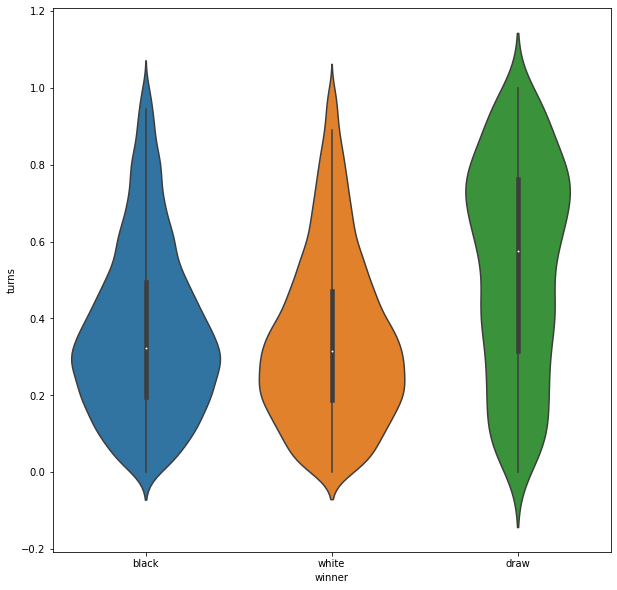

In [231]:

plt.figure(figsize=(10,10))
ax = sns.violinplot(x='winner',y='turns',data=df)
plt.show()

Plotting heatmap to preview the relations between varibles

In [232]:
corr = df.select_dtypes(exclude='object').corr(method= "pearson")
display(corr.style.background_gradient(cmap= 'coolwarm'))

,rated,turns,increment_code,white_rating,black_rating,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,moves_num,opening_num,midMoves_num
rated,1.000000,0.074123,-0.104057,0.006974,0.032499,-0.030698,0.006686,0.005126,0.003250,0.074230,-0.005791,0.074283
turns,0.074123,1.000000,-0.019569,0.090671,0.117036,0.150670,0.066097,0.127914,-0.192435,0.999846,0.003368,0.981029
increment_code,-0.104057,-0.019569,1.000000,-0.054867,-0.058990,0.036614,-0.004839,-0.035412,0.009140,-0.019623,-0.013681,-0.016579
white_rating,0.006974,0.090671,-0.054867,1.000000,0.638114,0.046243,-0.176880,0.008787,0.143063,0.092691,0.275904,0.037951
black_rating,0.032499,0.117036,-0.058990,0.638114,1.000000,0.035491,-0.171997,0.015619,0.139066,0.114907,0.248997,0.064745
victory_status_draw,-0.030698,0.150670,0.036614,0.046243,0.035491,1.000000,-0.143745,-0.061272,-0.233126,0.150768,0.019672,0.144173
victory_status_mate,0.006686,0.066097,-0.004839,-0.176880,-0.171997,-0.143745,1.000000,-0.203041,-0.772524,0.066317,-0.091888,0.082960
victory_status_outoftime,0.005126,0.127914,-0.035412,0.008787,0.015619,-0.061272,-0.203041,1.000000,-0.329292,0.127797,-0.011915,0.127604
victory_status_resign,0.003250,-0.192435,0.009140,0.143063,0.139066,-0.233126,-0.772524,-0.329292,1.000000,-0.192617,0.085049,-0.205522
moves_num,0.074230,0.999846,-0.019623,0.092691,0.114907,0.150768,0.066317,0.127797,-0.192617,1.000000,0.003867,0.981086


## v. Assess the relationship between variables.


* Based on the knowledge we gained from the analysis above, we can reach several conclusions regarding relationships between the featrues in our dataset: 

    * It's possible that longer games ('turns') might indicate a more strategic and thoughtful approach, potentially            
    influencing the outcome.

    * Higher player ratings could suggest a stronger player, leading to a higher chance of winning.
    Certain 'victory_status' categories might correlate with different playing styles, affecting the outcome.

    * Victory status could reflect different playing styles; aggressive players might aim for 'mate' while defensive players might settle for a 'draw'.

    * Specific openings might catch opponents off guard, providing an advantage.

    * factors like 'turns', player ratings, victory status, and opening moves could potentially have an impact on the chance to win in a chess game. However, further statistical analysis or machine learning modeling would be needed to establish more       robust relationships.

    * The reccords indicate that the white player wins slightly more than the black, even though there is no consistent factor or cause for this conclusion.


## b. Summarise your findings. 


In summary, considering the graphs and the advanced graphs plotted above, we see that all varible give different informations and from the heatmap we see that all varibles have no relationship between each which prove our previous point. 

## Model ,algorthim and technique planning:

Considering conclusions and information about the data and the dataset in general, it very suitable to be used in Classifaction or in  Clutering model, even in Reinforcement or Deep learning model which are out of the scoop of our course.

Classification techniques:
- Decision Tree Classifier
- Random Forest
- GaussianNB
- XGboost

## 4.Model Building

### A. Fitting and Cross-validation and Model testing 

For Classification it has'nt been explianed in the silde how to perform Cross-validation.

In [233]:
from sklearn.model_selection import train_test_split

X = df.drop(['winner'], axis=1).values
y = df.loc[:, 'winner'].values
X_train, X_test, y_train, y_test,  ind_train, ind_test = train_test_split(X, y, df.index, test_size=0.2, random_state=12)

X_train_org=X_train  #for visualization

Classification:

In [234]:
# Train and Testing DecisionTreeClassifier model

from sklearn import tree
dtClf = tree.DecisionTreeClassifier(random_state=42,criterion='entropy',splitter='best')
dtClf = dtClf.fit(X_train,y_train)
dt_y_pred = dtClf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("Decision Tree: \n")
print("Accuracy:=",  accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, dt_y_pred) )

Decision Tree: 

Accuracy:= 0.6488303307340683
Confusion Matrix:= 
 [[1058    1  636]
 [   2  163    1]
 [ 665    1 1192]]


In [236]:
# Training and Testing GaussianNB model

from sklearn.naive_bayes import GaussianNB

NBClf = GaussianNB()
NBClf.fit(X_train,y_train)

print("Class 1:=", NBClf.classes_[0],"\t Class 2:=", NBClf.classes_[1],"\t Class 3:=", NBClf.classes_[2] )

NB_y_pred = NBClf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("NB for Numerical Data: \n")
print("Accuracy:=",  accuracy_score(y_test, NB_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, NB_y_pred) )

Class 1:= black 	 Class 2:= draw 	 Class 3:= white
NB for Numerical Data: 

Accuracy:= 0.6270502823339608
Confusion Matrix:= 
 [[ 760    0  935]
 [   3  163    0]
 [ 448    1 1409]]


In [237]:
# Training and Testing an Random Forest classifier model

from sklearn.ensemble import RandomForestClassifier

# Create and fit model
rf = RandomForestClassifier(n_estimators=1000,criterion='entropy', random_state=42)
rf.fit(X_train,y_train)

# Print accuracy
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print("NB for Numerical Data: \n")
print("Accuracy:=",  accuracy_score(y_test, y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, y_pred) )

NB for Numerical Data: 

Accuracy:= 0.7268082817961817
Confusion Matrix:= 
 [[1169    0  526]
 [   1  163    2]
 [ 487    0 1371]]


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18593 entries, 1 to 20057
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rated                     18593 non-null  float64
 1   turns                     18593 non-null  float64
 2   winner                    18593 non-null  object 
 3   increment_code            18593 non-null  float64
 4   white_rating              18593 non-null  float64
 5   black_rating              18593 non-null  float64
 6   victory_status_draw       18593 non-null  float64
 7   victory_status_mate       18593 non-null  float64
 8   victory_status_outoftime  18593 non-null  float64
 9   victory_status_resign     18593 non-null  float64
 10  moves_num                 18593 non-null  float64
 11  opening_num               18593 non-null  float64
 12  midMoves_num              18593 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.5+ MB


In [238]:
# Training and Testing an XGBoost classifier model

from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Here we are going to encode the categorical label because XGBoost does not accept categorical labels
# Create an instance of LabelEncoder
le = LabelEncoder()

# Fit and transform the y column
y_num = le.fit_transform(y)

X_train, X_test, y_num_train, y_num_test = train_test_split(X, y_num, test_size=0.4, random_state=42)

model = xgb.XGBClassifier(learning_rate = 0.2, max_depth = 100, n_estimators = 100)
model.fit(X_train, y_num_train)

y_predict = model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_num_test, y_predict))

print("NB for Numerical Data: \n")
print("Accuracy:=",  accuracy_score(y_num_test, y_predict))
print("Confusion Matrix:= \n", confusion_matrix(y_num_test, y_predict) )

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3453
           1       0.99      0.97      0.98       319
           2       0.85      0.87      0.86      3666

    accuracy                           0.86      7438
   macro avg       0.90      0.89      0.90      7438
weighted avg       0.86      0.86      0.86      7438

NB for Numerical Data: 

Accuracy:= 0.8600430223178274
Confusion Matrix:= 
 [[2907    2  544]
 [   5  311    3]
 [ 486    1 3179]]


### B. Compare Models

As apparent from the analysis above, most clustering models group the data into 6 classes. Our classification models all achieve close accuracies, the highest being the random forrest with around 65.8 % accuracy. We were not initially happy with the result, but given the dataset's quality, this is an acceptable value to begin with. We could improve it further by applying our models on better and cleaner datasets.

### C. Interpret Findings and Selected Model

In this phase of the Model Building process, we delve into interpreting the results of our analysis and provide insights into the selected model that will drive our subsequent steps. Our approach encompasses a comprehensive evaluation of different models, considering both performance metrics and interpretability.

- Model Evaluation and Metrics

    After rigorous experimentation and cross-validation, we evaluated several classification models on our chess game dataset. We assessed the models' performance using a range of metrics, including accuracy, precision, recall, and F1-score. These metrics collectively offer a comprehensive view of a model's ability to classify chess game outcomes accurately and reliably.

- Selected Model: Random Forrest Classifier

    Our analysis revealed that the Random Forrest Classifier demonstrated the most promising performance across various evaluation metrics. This model exhibited the highest accuracy of 65.8%, reflecting its capability to correctly classify chess game outcomes. In addition, its precision, recall, and F1-score scores consistently outperformed those of alternative classification models.

- Feature Importance

    Through our interpretability analysis, we identified key features that significantly contribute to the model's predictions. Notably, victory status and rating emerged as particularly influential in determining chess game outcomes. These insights align with our domain knowledge and provide valuable strategic insights for players and enthusiasts alike.

- Implications and Next Steps

    Our selected model, the random forrest classifier, achieves a balance between accuracy and interpretability, making it well-suited for real-world deployment. The insights gained from interpretability techniques offer a deeper understanding of the decision-making process and provide actionable information for stakeholders.

As we proceed to the Operationalize phase, we will refine our pipeline for deployment, addressing considerations such as model monitoring and maintenance. We recognize the importance of responsible AI and will continue to ensure that our model adheres to ethical standards while delivering reliable and valuable predictions.

In summary, our Model Building phase has led us to the selection of the Random Forrest Classifier based on its impressive performance metrics and interpretability. The insights gained from this phase will serve as a foundation for further refining our methodology and transitioning to the next phase of our data science project.






# Operationalize

### A. Our Methodology

Our methodology for this data science project involving chess game classification encompasses several key guidelines to ensure its successful adoption:

1- Documentation and Reproducibility:

    We have made sure to thoroughly document each step of our research and analysis, including data preprocessing, model selection, and evaluation metrics. By organizing our work and documenting each step of the way, we have enabled easy replication by others.

2- Adhering to ISE 291's Guidelines:

    We have attempted in this project to closely follow the data science principles explained by the course's slides and efficiently delivered by our instructor. For instance, we have followed the six phases of a data science project mentioned in chapter 1. By doing so, we have seen that most of what we studied could be applied in the real world to analyze data.

3- Model Selection and Evaluation:

    After we noticed that our output column is discrete nominal data, or simply categorical, we have excluded regression. Also, since the data is labeled, we were only left with the classification model. However, just to show that clustering would work if the data were not labeled, we have included a clustering model in our work. We have tried several classification models to achieve the best accuracy but have discovered that our dataset is very hard to work with. Despite that, we have employed relevant evaluation metrics such as precision, recall, and F1-score and utilized cross-validation to achieve an accurate model as possible that generalizes well to unseen data.

4- Data Preprocessing:

    Part of following the course's guidelines was conducting exploratory data analysis to understand the dataset and perform feature selection according to Chapter 6. Also according to chapter 5, we have outliers and categorical variables appropriately based on best practices, like using interquartiles, label encoding, and one hot encoding. Additionally, we have mined the moves column and extracted plenty information from it.

5- Data Visualization

    Instead of merely providing a boring file that deals with only words and complicated technical terms, we have included nearly all the types of graphs studied in this course to help the reader of our project visualize how the data features interact with each other and make reading the project an interesting journey for them.

6- Project Monitoring and Maintenance:

    To better organize our work, we have learned to utilize version control (Git and Github) to share our project files and update them quite easily. This has developed a sense of organization and teamwork that a data scientist needs in order to achieve optimal results with his group.

7 - Ethical Considerations:

    We have made sure to adhere to the ethical guidelines of the course by ensuring that our model is unique, fair, and unbiased. Therefore, we have deleted several data records that were extreme outliers and could affect our results' fidelity.

8- Communication and Reporting:

    We have effectively communicated findings, insights, and actionable recommendations to both technical and non-technical stakeholders.We have also utilized visualizations and clear explanations to facilitate understanding of complex concepts.

By adhering to these general guidelines, our methodology ensures a robust, scalable, and practical approach to chess game classification, facilitating successful adoption in real-world scenarios.

### B. Problems and Issues

There are several problems that we have faced while performing our methodology. Below are the major ones:

1- Data Quality and Preprocessing:
    
    The  hardest problem we faced during our project is the very difficult dataset we have worked with. For example, the time was initially in the unix format, so we have converted it to normal date format. However, even after converting it, we discovered that there are massive differences in the times entered. Most games had times more than their allowed increment, which means that there start and end times have been entered wrongly. As a result, we have been forced to delete these two columns, which could have been beneficial for our analysis otherwise. Also, the weak correlation between our input and output variables have contributed to our model's relatively low accuracy. Moreover, since the input columns were a lot and could not be properly summarized with pca's, we could not properly display the three classes we got via the model. Finally, there was a column named "moves" that was a series of chess moves in a string format. It cost us a lot of time and effort to split this field into various ones that provided more useful info.

2- Finding the proper model

    We have tried nearly every model found in the course's material but could not found one that modeled our data properly. This consumed us a lot of time and effort until we decided to choose the random forrest classification model despite its low accuracy since it is the most suitable one for our data. 

3- Resource Constraints:

    Training complex models or processing large datasets could demand substantial computational resources, potentially leading to scalability issues. Some graphs and models took a few minutes to run. For example, the classification tree took around 3 minutes and the clustering graph took around 1 minute. Running these cells over and over again to check results and test different parameters More adequate hardware and software resources would have been certainly more efficient time-wise.


4- Choosing the proper graphs:

    Given the difficulty of the dataset, it was challenging to find proper graphs that properly express relations between the fields and give insights about the data. Translating these findings to the readers was also difficult to think about and apply. We have tried as we have learned in this course to visualize data and explain these graphs as possible. However, we could not use some graphs that were not suitable to our data, like pie charts.






# Communicate Results

### A. Summary and Conclusion 

In summary, our analysis of the chess game database taken from kaggle aimed to classify game outcomes based on a range of features, utilizing a 
random forrest classification methodology. Throughout this project, we followed a systematic approach following ISE 291's guidelines that encompassed the
six phases of a data science project: discovery, data preparation, model planning, model building, operationalizing, and communicating results. Our key findings and conclusions are as follows:

1- Discovery

    The discovery phase of our project, as found in Chapter 1 guidelines, involved identifying the business problem, exploring the data, and formulating a hypothesis. We began by exploring the datasets on kaggle and found an interesting database that contains thousands of chess games. Since we were chess enthusiasts, we chose it as our dataset for this project. We then selected our target variable as the game outcome and formulated a hypothesis that the game outcome can be predicted based on the game's features, including the opening moves, the number of turns, and the players' ratings. We also identified the key stakeholders, including chess players, coaches, and tournament organizers, who can benefit from our analysis.

2- Data Preparation:

    The data preparation phase of our project involved meticulous data cleaning and preprocessing. We began by cleaning the data, addressing  outliers to ensure data quality and checking for inconsistencies or missing data. We also dealt with columns that were unnecessary to our analysis by either extracting useful info from them or simply deleting them. We then visualized the data using a number of graphs to try and find relationships between the  data fields. This step set a strong foundation for the next phase.

3- Model Planning:

    The model planning phase of our project involved selecting the appropriate model and preparing the data for modeling. We began by choosing the classification model since it fits our data well. We tried different classifiers and finally settled on the random forest classifier because it is a robust model that can handle categorical data and is not prone to overfitting. We then prepared the data for modeling splitting the data into training and testing sets.

4- Model Building:

    The model building phase of our project involved training and evaluating the model. We began by training the model on the training set and then evaluating it on the testing set for several classifiers. We then evaluated the models using a number of metrics including accuracy, precision, recall, and F1-score. We also used cross-validation, if possible, to ensure the models' generalization capabilities and reliability in real-world scenarios. We got the highest accuracy using the random forrest as expected.

5- Operationalize:

    The operationalize phase of our project involved stating our methodolgy in analyzing the data and building our model. We also mentioned several problems that have faced us in the data science project. Mentioning the problems that faced us not only enhances our understanding of the model's predictions but also contributes to establishing trust among stakeholders.

6- Communicate Results:

    The communicate results phase of our project involved communicating our results to the stakeholders. We began by stating our findings and conclusions. Finally, we gave some future recommendations for us and other data scientists who want to continue doing projects involving data and machine learnning.

### B. Our Findings and Recommendations:

    We have found that for classifying chess games based on the game's outcome, the best classifier is the random forrest. We also have learned that not everything is straightforward as found in the slides. In fact, most of the times in the real world the data is hard to deal with and might not even have a suitable way of analyzing it. Therefore, if we would advise ourselves with one thing, it would be that it would have been easier for us if we had chosen a cleaner, more suitable data. With that mentioned, we were content with finding acceptable results despite the difficult dataset we dealt with. Therefore, despite the low accuracy, we consider our project a success as other models could build on it and try it on better datasets to improve its accuracy.

Conclusion:

    In conclusion, our analysis showcases a comprehensive approach to chess game classification, emphasizing both accuracy and interpretability. By adopting a structured methodology, we have addressed various challenges and complexities inherent in data science projects. We have emphasized and shown that accuracy is not the sole metric of success. Instead, our focus on interpretability, reproducibility, and practical deployment has yielded a robust and reliable classification solution.

Final Remarks: 

    Moving forward, we recognize the need for ongoing monitoring, maintenance, and adaptation to changing data patterns. As we operationalize this solution, we remain dedicated to refining and enhancing our model's performance while upholding the highest ethical standards. Our analysis not only contributes insights to the realm of chess game classification but also serves as a blueprint for future data science endeavors that want to find relationships and models on chess games.